In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager as fm
fontprop= fm.FontProperties( fname='malgun.ttf', size=15)

sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

In [2]:
data= pd.read_csv('./seoul_monthly_dust_datas.csv', encoding='utf-8')
data.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,201905,강남구,0.030,0.032,0.4,0.006,57.0,30.0
1,201905,강남대로,0.055,0.019,0.6,0.004,83.0,36.0
2,201905,강동구,0.038,0.031,0.5,0.005,60.0,30.0
3,201905,강변북로,0.066,0.018,0.5,0.003,83.0,39.0
4,201905,강북구,0.021,0.044,0.5,0.003,67.0,27.0


In [3]:
#컬럼 알아보기
data.columns

Index(['측정월', '측정소명', '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)',
       '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11636 entries, 0 to 11635
Data columns (total 8 columns):
측정월             11636 non-null int64
측정소명            11636 non-null object
이산화질소농도(ppm)    11173 non-null float64
오존농도(ppm)       10908 non-null float64
일산화탄소농도(ppm)    11145 non-null float64
아황산가스(ppm)      10889 non-null float64
미세먼지(㎍/㎥)       9225 non-null float64
초미세먼지(㎍/㎥)      3027 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 727.3+ KB


In [5]:
# 미세먼지 데이터로우의 개수
data_len=data.shape[0]
data_len

11636

In [6]:
# 컬럼별 nan값의 개수를 카운트.
data.isna().sum()

측정월                0
측정소명               0
이산화질소농도(ppm)     463
오존농도(ppm)        728
일산화탄소농도(ppm)     491
아황산가스(ppm)       747
미세먼지(㎍/㎥)       2411
초미세먼지(㎍/㎥)      8609
dtype: int64

In [7]:
nan_cnt_info = data.isna().sum()
print('type(nan_cnt_info): ',type(nan_cnt_info))

# nan의 개수가 0이 아닌 컬럼들만을 모은다.
nan_exist_cols= [ col for col, val in zip(nan_cnt_info.index, nan_cnt_info.values) if val>0]
nan_exist_cols

type(nan_cnt_info):  <class 'pandas.core.series.Series'>


['이산화질소농도(ppm)',
 '오존농도(ppm)',
 '일산화탄소농도(ppm)',
 '아황산가스(ppm)',
 '미세먼지(㎍/㎥)',
 '초미세먼지(㎍/㎥)']

In [8]:
# nan값대신 0으로 한다.
for nan_col in nan_exist_cols:
    data[nan_col]= data[nan_col].fillna(0)
    
data.loc[ data['측정월']==198701].head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
11626,198701,광진구,0.010,0.002,3.0,0.078,0.0,0.0
11627,198701,구로구,0.035,0.008,6.0,0.153,0.0,0.0
11628,198701,구로구2,0.019,0.006,3.9,0.192,0.0,0.0
11629,198701,도봉구,0.038,0.012,7.2,0.200,0.0,0.0
11630,198701,서대문구,0.056,0.000,6.4,0.117,0.0,0.0


In [9]:
# 그러나 측정월, 측정소명, 미세먼지, 초미세먼지만 필요하므로..
data=data.drop(['이산화질소농도(ppm)','오존농도(ppm)','일산화탄소농도(ppm)', '아황산가스(ppm)',], axis=1)
data.head()

,측정월,측정소명,미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,201905,강남구,57.0,30.0
1,201905,강남대로,83.0,36.0
2,201905,강동구,60.0,30.0
3,201905,강변북로,83.0,39.0
4,201905,강북구,67.0,27.0


In [10]:
check_month=data['측정월'].tolist()
print('check_month type',type(check_month))
check_month

check_month type <class 'list'>


[201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201905,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201904,
 201903,
 201903,
 201903,
 201903,
 201903,
 201903,
 201903,
 201903,
 201903,
 201903,
 201903,
 201903,
 201903,
 201903,
 201903,
 201903,
 201903,
 201903,
 201903,
 

In [11]:
data['Year']= data['측정월']//100
data

,측정월,측정소명,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),Year
0,201905,강남구,57.0,30.0,2019
1,201905,강남대로,83.0,36.0,2019
2,201905,강동구,60.0,30.0,2019
3,201905,강변북로,83.0,39.0,2019
4,201905,강북구,67.0,27.0,2019
5,201905,강서구,68.0,29.0,2019
6,201905,공항대로,70.0,33.0,2019
7,201905,관악구,81.0,40.0,2019
8,201905,관악산,73.0,27.0,2019
9,201905,광진구,71.0,37.0,2019


In [12]:
# 저장..
data.to_csv('seoul_dustdata_preprocessed.csv', sep=',', encoding='euc-kr', index=False )

In [13]:
data2= pd.pivot_table( data, index='Year', aggfunc=np.sum)
data2

,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),측정월
Year,,,
1987,0.0,0.0,23844780
1988,530.0,0.0,23856780
1989,485.0,0.0,23868780
1990,667.0,0.0,25472848
1991,773.0,0.0,28472235
1992,417.0,0.0,28685736
1993,0.0,0.0,31889092
1994,0.0,0.0,37488466
1995,7445.0,0.0,61448022


In [14]:
data2.index

Int64Index([1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Year')

In [15]:
# rename 시키기.
data2.rename( columns={ 
                        '미세먼지(㎍/㎥)': 'PM-10',
                        '초미세먼지(㎍/㎥)':'PM-2.5'
                      }, inplace=True)
data2.head()

,PM-10,PM-2.5,측정월
Year,,,
1987,0.0,0.0,23844780
1988,530.0,0.0,23856780
1989,485.0,0.0,23868780
1990,667.0,0.0,25472848
1991,773.0,0.0,28472235


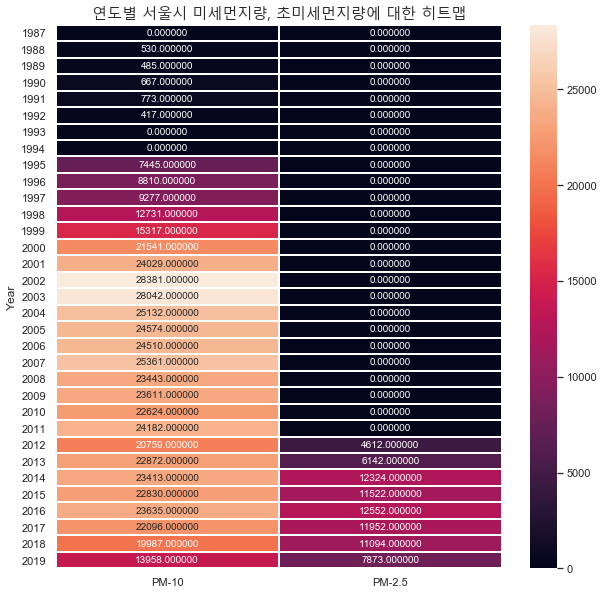

In [16]:
plt.figure(figsize=(10,10))
targets=['PM-10', 'PM-2.5']

plt.title('연도별 서울시 미세먼지량, 초미세먼지량에 대한 히트맵', fontproperties=fontprop )
sns.heatmap( data2[targets], annot=True, fmt='f', linewidths=1)
plt.show()


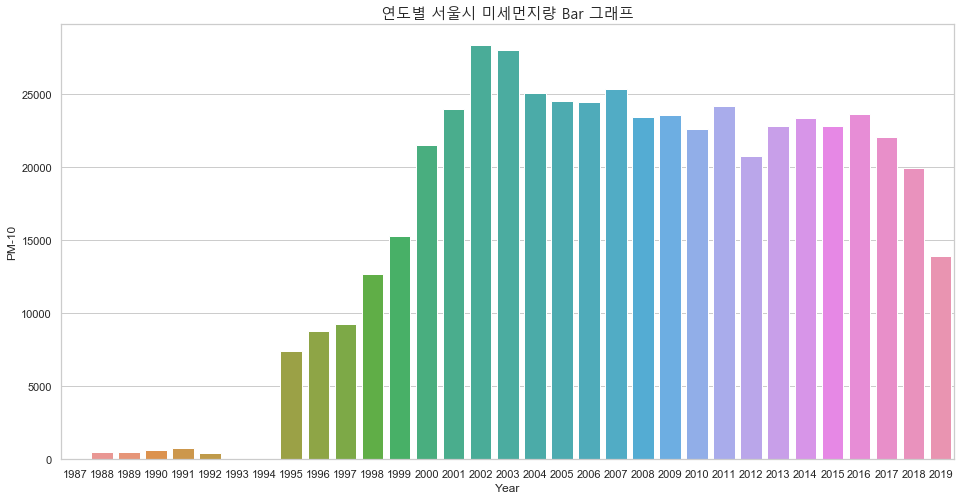

In [19]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
plt.title('연도별 서울시 미세먼지량(PM-10) Bar 그래프', fontproperties=fontprop)
sns.barplot(x=data2.index, y='PM-10', data=data2)

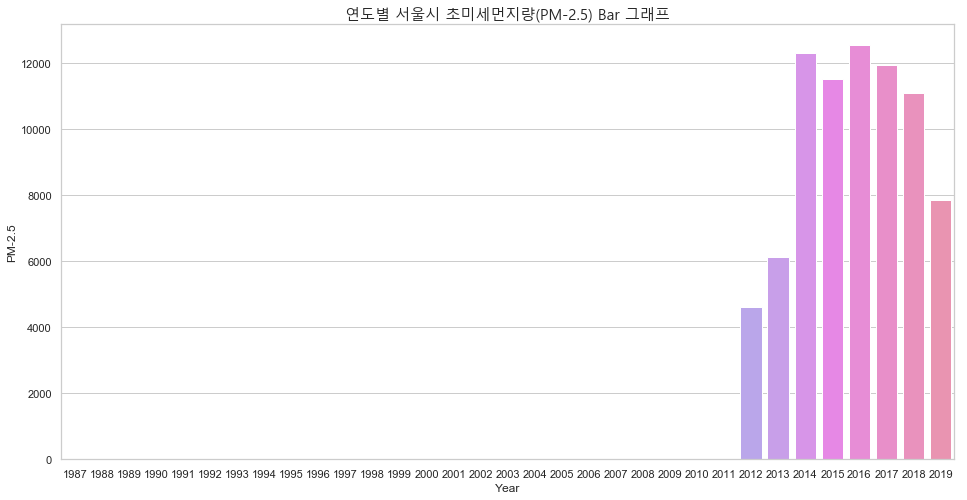

In [20]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
plt.title('연도별 서울시 초미세먼지량(PM-2.5) Bar 그래프', fontproperties=fontprop)
sns.barplot(x=data2.index, y='PM-2.5', data=data2)